<div style="text-align: right">
    <p style="text-align: right; font-weight: bold; font-size:x-large;">FIT1043 Introduction to Data Science <br> Assignment 1</p>
    <p style="text-align: right">Ian Tan, Mahdi Abolghasemi<br><br><i>12<sup>th</sup> August 2021</i></p>
</div>
<hr style="border-color: black;">

## Introduction
_You can write something about the assignment here and explain how you are going to approach the assignment.  In some cases, there is a need to explain the flow of your submission.  Note that wrong submission formats can result in totally 0 marks, or in some cases, a mark penalty.  Also, if the writing flow is not easily understood by the grader, penalty may also be imposed.  What is important here as a future Data Professional is communication skills._

### Importing Libraries

The first step is to import the library __pandas__, which is an open source data analysis tool for the python programming language.  The purpose of the importing this library is that we would like to use the data structure such as _DataFrame_ and it's associated functions such as reading from CSV files and so on.

In [1]:
import pandas as pd
# You can import the matplotlib here as well but can also be done later.

## Reading Datasets (1 mark)
Do not change the names or location of the data files as it will effect the grading process.

In [3]:
# Students should leave the data in the folder 'data' and read it as such.  If they move the file to the same folder,
# please subtract 0.5 marks
vaccination = pd.read_csv('data/Country-Vaccinations.csv')
population = pd.read_csv('data/2020-Population.csv')
gdp = pd.read_csv('data/2020-GDP.csv')

You are expected to show that the data has been read properly. Two of head, tail, or random parts would be enough. Give mark only to show the data. Do not award mark just for reading.

In [4]:
vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
population.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
300,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
301,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
302,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
303,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6
304,289,Estimates,United States of America,35,840,Country/Area,918,158 804,160 872,163 266,...,311 584,314 044,316 401,318 673,320 878,323 016,325 085,327 096,329 065,331 003


In [6]:
gdp.sample(5)

,Unnamed: 0,Gross domestic product 2020,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
235,LMC,NaN,NaN,Lower middle income,"7,328,774",NaN
296,NaN,NaN,NaN,NaN,NaN,NaN
155,BMU,152,NaN,Bermuda,"7,484",NaN
123,BWA,120,NaN,Botswana,"15,782",NaN
282,NaN,NaN,NaN,NaN,NaN,NaN


### Wrangling Data (4 marks in total)

For the next part, it is rather tricky, students can do it separately but for full marks, they should use

In [8]:
vaccination = vaccination.groupby(['country','vaccines']).agg(
    people_fully_vaccinated=('people_fully_vaccinated', 'max'),
    total_vaccinations=('daily_vaccinations', 'sum')
).reset_index()

This full aggregation should be given 2 marks and if any other longer method that requires longer more code is accepted by deduct 1 mark and 1 more mark deduction if renaming isn't via reset_index or needs to rename columns separately.

In [10]:
vaccination.sample(5)

,country,vaccines,people_fully_vaccinated,total_vaccinations
123,Malta,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",396160.0,761890.0
175,Seychelles,"Oxford/AstraZeneca, Sinopharm/Beijing",68553.0,142671.0
34,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",23479992.0,50257677.0
157,Pitcairn,Oxford/AstraZeneca,36.0,38.0
137,Nepal,"Oxford/AstraZeneca, Sinopharm/Beijing",2606046.0,6721046.0


Subsetting to get the right columns for population and GDO, renaming the columns in total 2 marks, one for each data

In [14]:
population

,Unnamed: 2,Unnamed: 77
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
300,Bermuda,62
301,Canada,37 742
302,Greenland,57
303,Saint Pierre and Miquelon,6


In [13]:
population = population.iloc[:,[2] + [-1]]

In [15]:
# Column renaming
population.columns = ["country","population"]

In [16]:
population.sample(5)

,country,population
17,UN development groups,...
23,Land-locked Developing Countries (LLDC),533 143
174,Curaçao,164
128,Tajikistan,9 538
204,Bolivia (Plurinational State of),11 673


In [17]:
gdp = gdp.iloc[:,[3,4]]

In [18]:
# Column renaming
gdp.columns = ["country","GDP"]

In [19]:
gdp.sample(5)

,country,GDP
205,Palau,268
211,Channel Islands,-
181,Lesotho,"1,845"
49,Czech Republic,"243,530"
171,Burundi,"3,258"


### Select just the requested countries - Create a list or tuple (2 marks in total)

Create a new list/tuple for the countries that we are interested in (they are to investigate the data and find out that they are different for each CSV and hence create 1 list/tuple) (1 mark).  Explain this advance data type called 'list'/'tuple' and why not use tuple/list.

In [63]:
# .5 mark for understanding what is a list and .5 mark for explaining the difference between list and tuples.
AusAsia = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand','Philippines',
       'Vietnam', 
       'Australia']

Students can select list or tuples, doesn't really matter.  The purpose is for them to think about it.

In [33]:
AusAsia =  ['Indonesia', 'Malaysia', 'Singapore', 'Thailand','Philippines', 'Australia']

1 mark understanding to subset data like done below

In [34]:
# Can be other functions, they have to figure out.
vaccination = vaccination[vaccination['country'].isin(AusAsia)]

In [35]:
population = population[population['country'].isin(AusAsia)]

In [36]:
gdp = gdp[gdp['country'].isin(AusAsia)]

### Merging  Dataframes (1 mark)

This is a bit tricky as the country name can be different for some of them. 

In [37]:
population.merge(gdp.merge(vaccination, on='country', how='left').drop_duplicates(),
        on='country', how='left')

,country,population,GDP,vaccines,people_fully_vaccinated,total_vaccinations
0,Indonesia,273 524,"1,058,424","Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",24481296.0,72386296.0
1,Malaysia,32 366,"336,664","Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",9048634.0,23687251.0
2,Philippines,109 581,"361,489","Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",11614590.0,23230492.0
3,Singapore,5 850,"339,998","Moderna, Pfizer/BioNTech",3862510.0,7911869.0
4,Thailand,69 800,"501,795","Oxford/AstraZeneca, Sinovac",4277071.0,18349011.0
5,Australia,25 500,"1,330,901","Oxford/AstraZeneca, Pfizer/BioNTech",4614203.0,13222783.0


In [222]:
# This is the DataFrame with the smaller number of countries
vaccination

,country,vaccines,people_fully_vaccinated,total_vaccinations
17,Cambodia,Sinopharm/Beijing,NaN,8171.0
47,Indonesia,Sinovac,825650.0,2022788.0
68,Myanmar,Oxford/AstraZeneca,NaN,82823.0
90,Singapore,Pfizer/BioNTech,110000.0,329630.0


In [38]:
# Students can do this in various ways, line by line or nested functions like below
myData = vaccination.merge(
    population.merge(
        gdp, on='country', how='left'),
    on='country', how='outer')

In [39]:
myData

,country,vaccines,people_fully_vaccinated,total_vaccinations,population,GDP
0,Australia,"Oxford/AstraZeneca, Pfizer/BioNTech",4614203.0,13222783.0,25 500,"1,330,901"
1,Indonesia,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",24481296.0,72386296.0,273 524,"1,058,424"
2,Malaysia,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",9048634.0,23687251.0,32 366,"336,664"
3,Philippines,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",11614590.0,23230492.0,109 581,"361,489"
4,Singapore,"Moderna, Pfizer/BioNTech",3862510.0,7911869.0,5 850,"339,998"
5,Thailand,"Oxford/AstraZeneca, Sinovac",4277071.0,18349011.0,69 800,"501,795"


## Feature Engineering GDP/Capita (2 marks in total)
String manipulation and types (1 mark)

Simple math computation and adding a column, but to test the students capability with types (1 mark)

In [40]:
myData.dtypes

country                     object
vaccines                    object
people_fully_vaccinated    float64
total_vaccinations         float64
population                  object
GDP                         object
dtype: object

Notice that the data type for population and GDP are not numeric.  Let's process them in order to get the per capita GDP.

Let's create the GDP per population column.  You will notice that the numbers are not numeric.

In [41]:
myData['GDP'] = myData['GDP'].str.replace(',','').astype('float')

In [42]:
myData['population'] = myData['population'].str.replace(' ','').astype('float')

In [43]:
myData['perCapitaGDP'] = myData['GDP'] * 1000 / myData['population']

In [44]:
myData

,country,vaccines,people_fully_vaccinated,total_vaccinations,population,GDP,perCapitaGDP
0,Australia,"Oxford/AstraZeneca, Pfizer/BioNTech",4614203.0,13222783.0,25500.0,1330901.0,52192.196078
1,Indonesia,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",24481296.0,72386296.0,273524.0,1058424.0,3869.583656
2,Malaysia,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",9048634.0,23687251.0,32366.0,336664.0,10401.779645
3,Philippines,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",11614590.0,23230492.0,109581.0,361489.0,3298.829177
4,Singapore,"Moderna, Pfizer/BioNTech",3862510.0,7911869.0,5850.0,339998.0,58119.316239
5,Thailand,"Oxford/AstraZeneca, Sinovac",4277071.0,18349011.0,69800.0,501795.0,7189.040115


## Statistics of Merged Datasets (1 mark in total)
describe() or similar with any 2 explanations, e.g. poorest/richest or dates (if applicable) (1 mark)

The expectation here is for the student to provide descriptive statistics. Not just show the statistics but explain what can be obtained from the statistics.  Example below the myData.describe()

In [45]:
myData.describe()

,people_fully_vaccinated,total_vaccinations,population,GDP,perCapitaGDP
count,6.000000e+00,6.000000e+00,6.000000,6.000000e+00,6.000000
mean,9.649717e+06,2.646462e+07,86103.500000,6.548785e+05,22511.790818
std,7.898244e+06,2.329115e+07,98938.939068,4.312256e+05,25483.057767
min,3.862510e+06,7.911869e+06,5850.000000,3.366640e+05,3298.829177
25%,4.361354e+06,1.450434e+07,27216.500000,3.453708e+05,4699.447771
50%,6.831418e+06,2.078975e+07,51083.000000,4.316420e+05,8795.409880
75%,1.097310e+07,2.357306e+07,99635.750000,9.192668e+05,41744.591970
max,2.448130e+07,7.238630e+07,273524.000000,1.330901e+06,58119.316239


What does /describe tell us?

For one, it is a sumarization of AusAsia countries, for example, from the count, we know all 6 countries have started their vaccination.  The mean, min, max, amd other quartiles are also shown.

Depending on when you did the data conversion for GDP and/or population, you may not get the statistics for it.  Else, you will find the most populated country and so on.

In [46]:
myData.shape

(6, 7)

## Visualisation (7 marks in total for 2 correctly selected visuals with extensive explanation on chosen visuals)
Note limited to the basic tools for now, do not use other libraries for this

Graph (1 mark - even if illogical representation) (1 mark for properly labelled graphs)

Explanation on why such a graph and also what can be concluded from the visuals (1 mark)

In [47]:
import matplotlib.pylab as plt
#import datetime
%matplotlib inline

In [48]:
piePlotData = myData[myData['vaccines'].notnull()]
piePlotData = piePlotData[['population','vaccines']]
piePlotData

,population,vaccines
0,25500.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1,273524.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
2,32366.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac"
3,109581.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
4,5850.0,"Moderna, Pfizer/BioNTech"
5,69800.0,"Oxford/AstraZeneca, Sinovac"


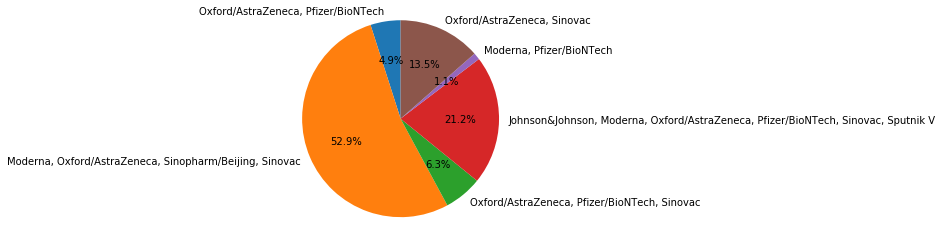

In [49]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = piePlotData['vaccines']
sizes = piePlotData['population']
#.str.replace(' ','').astype('float')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Students to provide some basic explanation of the pie chart.

## Question 2

In [50]:
barPlotData = myData[myData['country'].notnull()]
barPlotData['population'] = barPlotData['population'] * 1000
barPlotData = barPlotData[['country','total_vaccinations','people_fully_vaccinated','population']]
barPlotData

,country,total_vaccinations,people_fully_vaccinated,population
0,Australia,13222783.0,4614203.0,25500000.0
1,Indonesia,72386296.0,24481296.0,273524000.0
2,Malaysia,23687251.0,9048634.0,32366000.0
3,Philippines,23230492.0,11614590.0,109581000.0
4,Singapore,7911869.0,3862510.0,5850000.0
5,Thailand,18349011.0,4277071.0,69800000.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

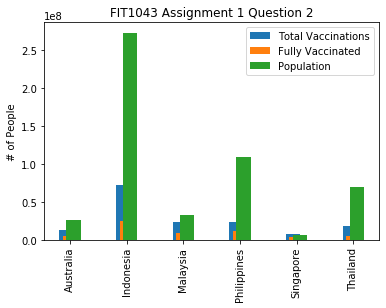

In [51]:
import numpy as np

labels = barPlotData['country']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
# my positioning is incorrect
ax.bar(x - width/4, barPlotData['total_vaccinations'], width, label='Total Vaccinations')
ax.bar(x, barPlotData['people_fully_vaccinated'], width, label='Fully Vaccinated')
ax.bar(x + width/4, barPlotData['population'], width, label='Population')

ax.set_ylabel('# of People')
ax.set_title('FIT1043 Assignment 1 Question 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

If the students do until this level, then only 1 mark for the graph.

The expectations is that the students will need to re-format it meaningfully visually, re-label them appropriately.  Set a bit higher benchmark for this part.  This is not a perfect solution, will leave it to the students.

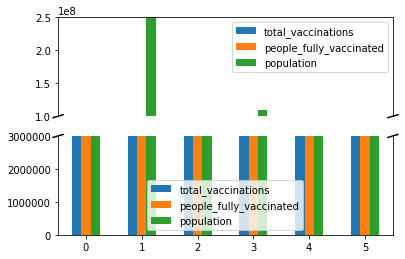

In [52]:
# Something like below but not tidily done example
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,3000000)
ax1.set_ylim(100000000,250000000)
barPlotData.plot(ax=ax1,kind='bar')
barPlotData.plot(ax=ax2,kind='bar')
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
plt.show()

or remove the other countries that do not have vaccinations yet

In [53]:
barPlotData1 = barPlotData[barPlotData['total_vaccinations'].notnull()]

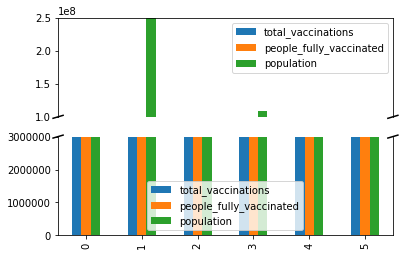

In [54]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,3000000)
ax1.set_ylim(100000000,250000000)
barPlotData1.plot(ax=ax1,kind='bar')
barPlotData1.plot(ax=ax2,kind='bar')
#for tick in ax2.get_xticklabels():
#    tick.set_rotation(0)
# those below this are for drawing the breaks
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

#plot
plt.show()

### Question 3

Just to get the students to plot a line graph, maybe figure out what they can do with inputing data for the missing data on total_vaccinations through the .cumsum() function (if they figure this out or they may do it manually).

In [55]:
# Re-read the vaccination file
vaccination = pd.read_csv('data/Country-Vaccinations.csv')

# Subset only Asutralia
vaccination = vaccination[vaccination['country'] == 'Australia']

In [56]:
vaccination.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1805,Australia,AUS,2021-04-15,1359665.0,NaN,NaN,63993.0,51931.0,5.33,NaN,NaN,2037.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1920,Australia,AUS,2021-08-08,13636580.0,9062787.0,4573793.0,140225.0,188408.0,53.48,35.54,17.94,7389.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1779,Australia,AUS,2021-03-20,253831.0,NaN,NaN,13077.0,13505.0,1.00,NaN,NaN,530.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1837,Australia,AUS,2021-05-17,3100137.0,NaN,NaN,10953.0,62417.0,12.16,NaN,NaN,2448.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1759,Australia,AUS,2021-02-28,31894.0,31894.0,NaN,1894.0,4556.0,0.13,0.13,NaN,179.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1918,Australia,AUS,2021-08-06,13270296.0,8897750.0,4372546.0,240039.0,180617.0,52.04,34.89,17.15,7083.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1829,Australia,AUS,2021-05-09,2654338.0,NaN,NaN,26613.0,57181.0,10.41,NaN,NaN,2242.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1799,Australia,AUS,2021-04-09,1077511.0,NaN,NaN,81366.0,36271.0,4.23,NaN,NaN,1422.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1821,Australia,AUS,2021-05-01,2234844.0,NaN,NaN,55300.0,45828.0,8.76,NaN,NaN,1797.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations
1919,Australia,AUS,2021-08-07,13496355.0,9006750.0,4489605.0,226059.0,184239.0,52.93,35.32,17.61,7225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations


In [57]:
vaccination.dtypes['date']

dtype('O')

In [58]:
linePlotData = vaccination[['date','daily_vaccinations']]

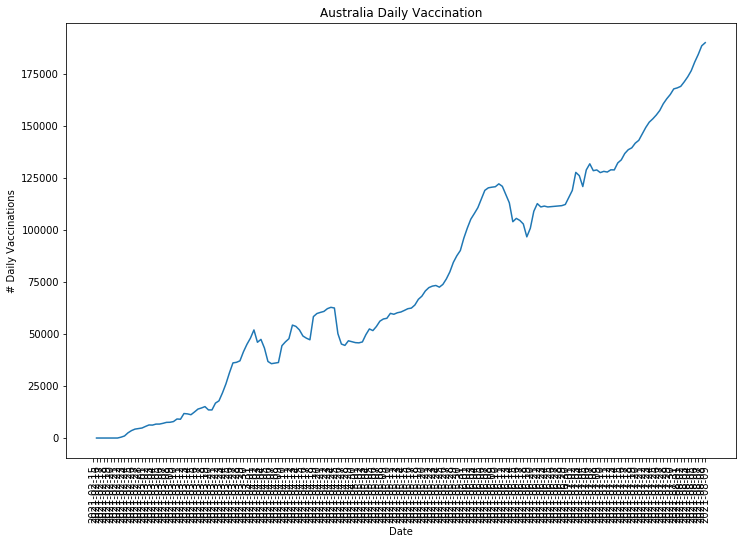

In [60]:
fig=plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(linePlotData['date'],linePlotData['daily_vaccinations'])
plt.title('Australia Daily Vaccination')
plt.xlabel('Date')
plt.ylabel('# Daily Vaccinations')
plt.show()

In [61]:
# But we want total
linePlotData['total_vaccinations'] = linePlotData['daily_vaccinations'].cumsum() 

/Users/mahdi/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [274]:
linePlotData

,date,daily_vaccinations,total_vaccinations
3467,2021-01-11,NaN,NaN
3468,2021-01-12,2800.0,2800.0
3469,2021-01-13,4090.0,6890.0
3470,2021-01-14,4520.0,11410.0
3471,2021-01-15,4735.0,16145.0
3472,2021-01-16,4864.0,21009.0
3473,2021-01-17,4950.0,25959.0
3474,2021-01-18,5011.0,30970.0
3475,2021-01-19,5380.0,36350.0
3476,2021-01-20,5380.0,41730.0


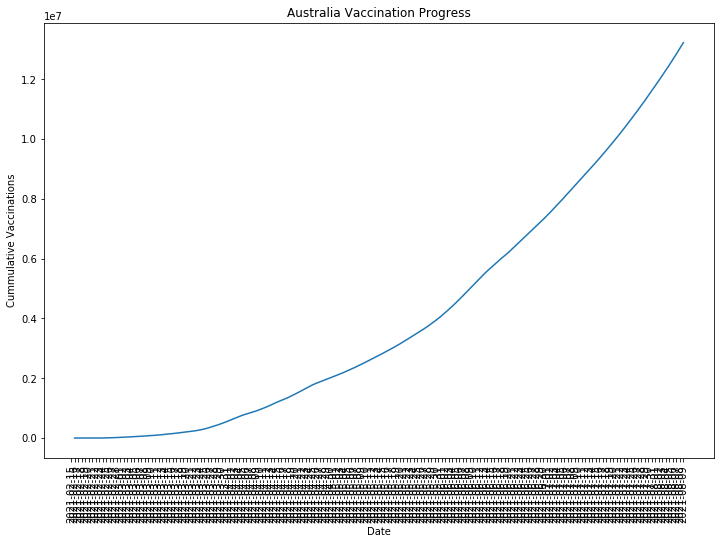

In [62]:
fig=plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(linePlotData['date'],linePlotData['total_vaccinations'])
plt.title('Australia Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Cummulative Vaccinations')
plt.show()

Expected some insights but also general knowledge.  As most of the vaccinations require 2 shots, by just looking at the cummulative number of vaccinations, it does not mean the number of people already received the required 2 dosage.  There may also be some waste dosage, as in each vial is enough for 6 but maybe just 5 is used (e.g. in Japan)

Minus marks for
- Not in right format (just zip accepted)
- Late penalty as University policy